# Import Libraries and Dependency

In [49]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.5 MB/s eta 0:00:00


In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly as px
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')
import re

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# Data Wrangling

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Direktori Kiara
df = pd.read_csv('/content/drive/MyDrive/Dataset/hotels.csv')

# Direktori Alviya
#df = pd.read_csv('/content/drive/MyDrive/MACHINE LEARNING/Dataset/hotels.csv')

In [50]:
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,month,is_canceled_label
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,183.081384,0,Transient,0.0,0,0,Check-Out,2015-07-01,7,Not Cancelled
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,183.081384,0,Transient,0.0,0,0,Check-Out,2015-07-01,7,Not Cancelled
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,183.081384,0,Transient,75.0,0,0,Check-Out,2015-07-02,7,Not Cancelled
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,183.081384,0,Transient,75.0,0,0,Check-Out,2015-07-02,7,Not Cancelled
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,183.081384,0,Transient,98.0,0,1,Check-Out,2015-07-03,7,Not Cancelled


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87396 entries, 0 to 119389
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87396 non-null  object        
 1   is_canceled                     87396 non-null  int64         
 2   lead_time                       87396 non-null  int64         
 3   arrival_date_year               87396 non-null  int64         
 4   arrival_date_month              87396 non-null  object        
 5   arrival_date_week_number        87396 non-null  int64         
 6   arrival_date_day_of_month       87396 non-null  int64         
 7   stays_in_weekend_nights         87396 non-null  int64         
 8   stays_in_week_nights            87396 non-null  int64         
 9   adults                          87396 non-null  int64         
 10  children                        87396 non-null  float64       
 11  babies

In [52]:
df.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
is_canceled,87396.0,0.274898,0.0,0.0,0.0,1.0,1.0,0.446466
lead_time,87396.0,79.891368,0.0,11.0,49.0,125.0,737.0,86.052325
arrival_date_year,87396.0,2016.210296,2015.0,2016.0,2016.0,2017.0,2017.0,0.686102
arrival_date_week_number,87396.0,26.838334,1.0,16.0,27.0,37.0,53.0,13.674572
arrival_date_day_of_month,87396.0,15.815541,1.0,8.0,16.0,23.0,31.0,8.835146
stays_in_weekend_nights,87396.0,1.005263,0.0,0.0,1.0,2.0,19.0,1.031921
stays_in_week_nights,87396.0,2.625395,0.0,1.0,2.0,4.0,50.0,2.053584
adults,87396.0,1.875795,0.0,2.0,2.0,2.0,55.0,0.6265
children,87396.0,0.13864,0.0,0.0,0.0,0.0,10.0,0.45587
babies,87396.0,0.010824,0.0,0.0,0.0,0.0,10.0,0.113597


In [4]:
duplicates = df.duplicated().sum()
print(f"Banyak kolom duplikat sebelum cleaning: {duplicates}")

Banyak kolom duplikat sebelum cleaning: 31994


In [5]:
df.drop_duplicates()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [7]:
df.duplicated().sum()

31994

In [8]:
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [9]:
numeric_columns = df.select_dtypes(include='number').columns
categorical_columns = df.select_dtypes(include='object').columns

In [10]:
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

In [11]:
print("\nPreview data clean:")
df.head()


Preview data clean:


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,86.693382,189.266735,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,86.693382,189.266735,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,86.693382,189.266735,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.000000,189.266735,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.000000,189.266735,0,Transient,98.0,0,1,Check-Out,2015-07-03


# Explanatory Data Analysis

In [60]:
df.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
is_canceled,87396.0,0.274898,0.0,0.0,0.0,1.0,1.0,0.446466
lead_time,87396.0,79.891368,0.0,11.0,49.0,125.0,737.0,86.052325
arrival_date_year,87396.0,2016.210296,2015.0,2016.0,2016.0,2017.0,2017.0,0.686102
arrival_date_week_number,87396.0,26.838334,1.0,16.0,27.0,37.0,53.0,13.674572
arrival_date_day_of_month,87396.0,15.815541,1.0,8.0,16.0,23.0,31.0,8.835146
stays_in_weekend_nights,87396.0,1.005263,0.0,0.0,1.0,2.0,19.0,1.031921
stays_in_week_nights,87396.0,2.625395,0.0,1.0,2.0,4.0,50.0,2.053584
adults,87396.0,1.875795,0.0,2.0,2.0,2.0,55.0,0.6265
children,87396.0,0.13864,0.0,0.0,0.0,0.0,10.0,0.45587
babies,87396.0,0.010824,0.0,0.0,0.0,0.0,10.0,0.113597


In [61]:
df[categorical_columns]

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,is_canceled_label
0,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,Not Cancelled
1,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,Not Cancelled
2,Resort Hotel,July,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,Check-Out,Not Cancelled
3,Resort Hotel,July,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out,Not Cancelled
4,Resort Hotel,July,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,Not Cancelled
...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,August,BB,BEL,Offline TA/TO,TA/TO,A,A,No Deposit,Transient,Check-Out,Not Cancelled
119386,City Hotel,August,BB,FRA,Online TA,TA/TO,E,E,No Deposit,Transient,Check-Out,Not Cancelled
119387,City Hotel,August,BB,DEU,Online TA,TA/TO,D,D,No Deposit,Transient,Check-Out,Not Cancelled
119388,City Hotel,August,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,Not Cancelled


# Analyze Data

## Pendapatan Pertahun dari Kedua Tipe Hotel

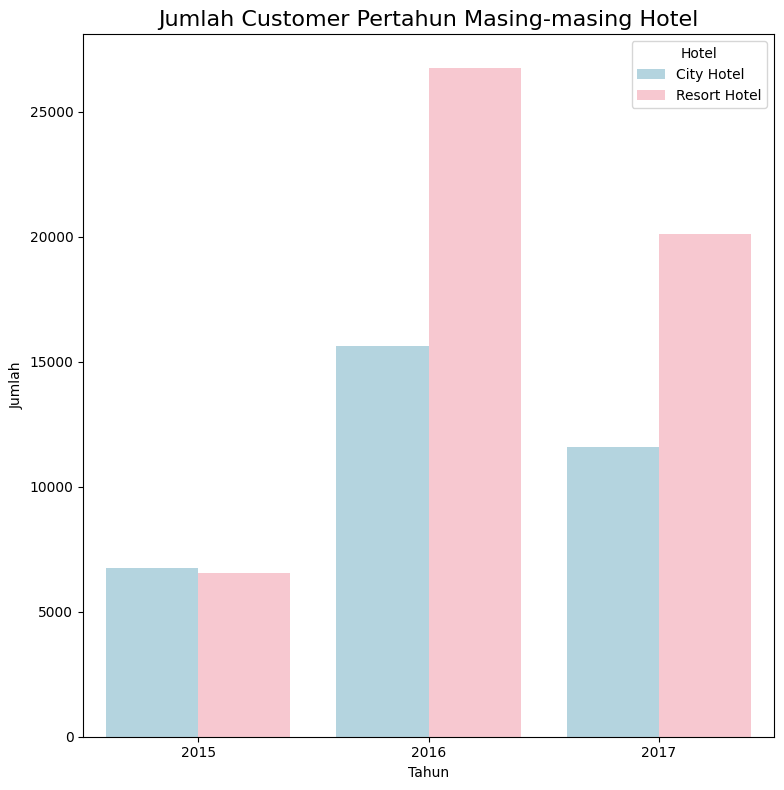

In [18]:
palette = ['#ADD8E6', '#FFC0CB']

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.countplot(x='arrival_date_year', hue='hotel', data=df, palette=palette)
plt.title("Jumlah Customer Pertahun Masing-masing Hotel", size=16)

plt.xlabel("Tahun")
plt.ylabel("Jumlah")
plt.legend(title="Hotel", loc="upper right", labels=['City Hotel', 'Resort Hotel'])

plt.tight_layout()
plt.show()


## Average Daily Rate Perbulan dari Kedua Tipe Hotel

In [62]:
data_resort = df[(df['hotel'] == 'Resort Hotel') & (df['is_canceled'] == 0)]
data_city = df[(df['hotel'] == 'City Hotel') & (df['is_canceled'] == 0)]

In [63]:
months_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

In [64]:
resort_hotel=data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
resort_hotel['arrival_date_month'] = pd.Categorical(
    resort_hotel['arrival_date_month'], categories=months_order, ordered=True)

resort_hotel = resort_hotel.sort_values('arrival_date_month').reset_index(drop=True)

resort_hotel

,arrival_date_month,adr
0,January,48.542066
1,February,53.624311
2,March,57.083964
3,April,76.841664
4,May,77.725129
5,June,108.970363
6,July,150.914540
7,August,182.103524
8,September,98.855456
9,October,62.578195


In [65]:
city_hotel=data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel['arrival_date_month'] = pd.Categorical(
    city_hotel['arrival_date_month'], categories=months_order, ordered=True)

city_hotel = city_hotel.sort_values('arrival_date_month').reset_index(drop=True)

city_hotel

,arrival_date_month,adr
0,January,83.180097
1,February,87.843338
2,March,90.759820
3,April,114.121066
4,May,124.533785
5,June,120.486062
6,July,119.740148
7,August,122.497179
8,September,116.723183
9,October,105.140685


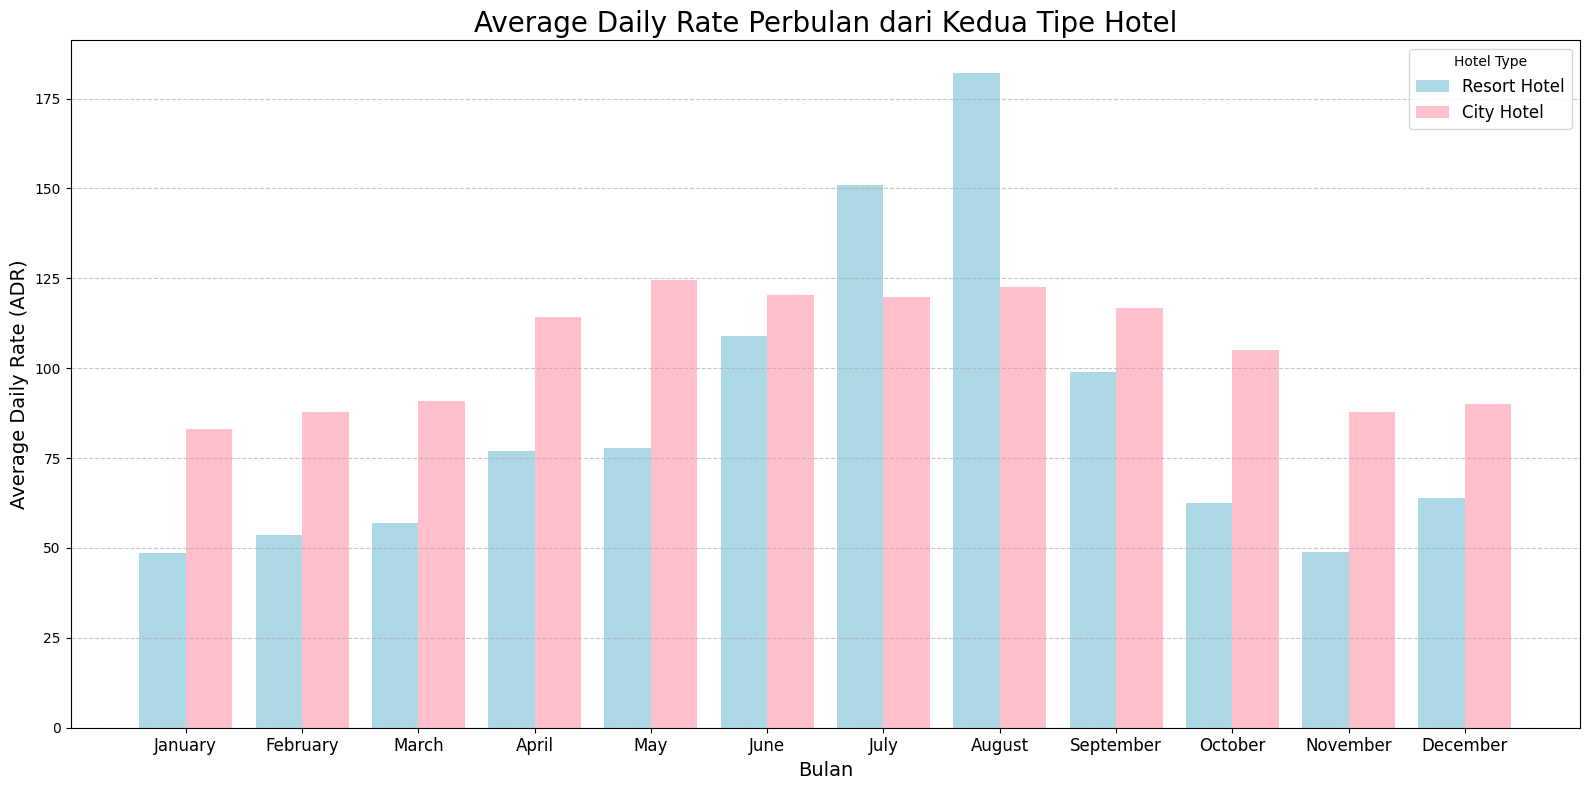

In [66]:
width=0.4
x = np.arange(len(months_order))

plt.figure(figsize=(16, 8))
plt.bar(x - width/2, resort_hotel['adr'], color='#ADD8E6', width=width, label='Resort Hotel')
plt.bar(x + width/2, city_hotel['adr'], color='#FFC0CB', width=width, label='City Hotel')
plt.title('Average Daily Rate Perbulan dari Kedua Tipe Hotel', size=20, color='black')
plt.xlabel('Bulan', size=14)
plt.ylabel('Average Daily Rate (ADR)', size=14)
plt.xticks(ticks=x, labels=months_order, fontsize=12)
plt.legend(title='Hotel Type', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Status Reservasi

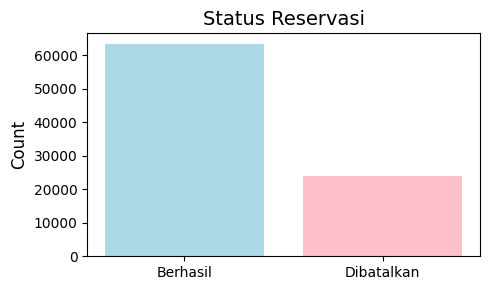

In [67]:
canceled_reservation = df['is_canceled'].value_counts()
palette = ['#ADD8E6', '#FFC0CB']

plt.figure(figsize=(5, 3))
plt.title('Status Reservasi', fontsize=14, color='black')
plt.bar(['Berhasil', 'Dibatalkan'], df['is_canceled'].value_counts(), color=palette)
plt.ylabel('Count', fontsize=12, color='black')
plt.tight_layout()
plt.show()

## Status Reservasi Tiap Tipe Hotel

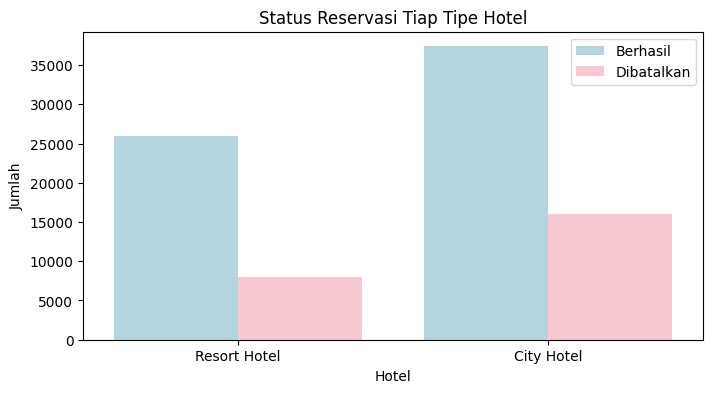

In [26]:
plt.figure(figsize=(8, 4))

ax1 = sns.countplot(
    x='hotel',
    hue='is_canceled',
    data=df,
    palette={0: '#ADD8E6', 1: '#FFC0CB'}
    )

legend_labels, _ = ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1, 1))

plt.title('Status Reservasi Tiap Tipe Hotel')
plt.xlabel('Hotel',color='Black')
plt.ylabel('Jumlah', color='Black')
plt.legend(['Berhasil', 'Dibatalkan'])
plt.show()

## Banyaknya Pembatalan Reservasi Perbulan

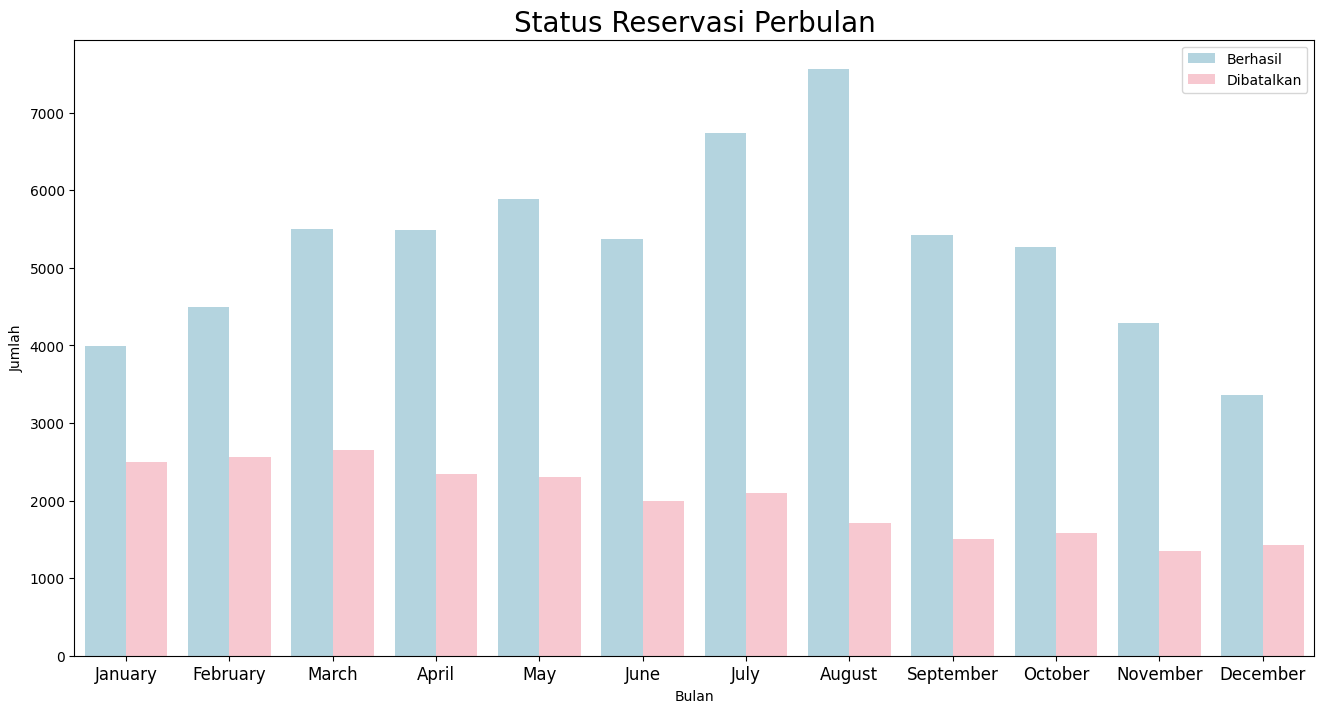

In [27]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])
df['month'] = df['reservation_status_date'].dt.month
plt.figure(figsize=(16,8))
ax1 = sns.countplot(x='month', hue='is_canceled', data= df, palette = palette)
legend_lebels,_ = ax1.get_legend_handles_labels()
plt.title('Status Reservasi Perbulan', size = 20)
plt.xticks(ticks=x, labels=months_order, fontsize=12)
plt.xlabel('Bulan')
plt.ylabel('Jumlah')
plt.legend(['Berhasil','Dibatalkan'])
plt.show()

## Jumlah Customer Reservasi Ulang

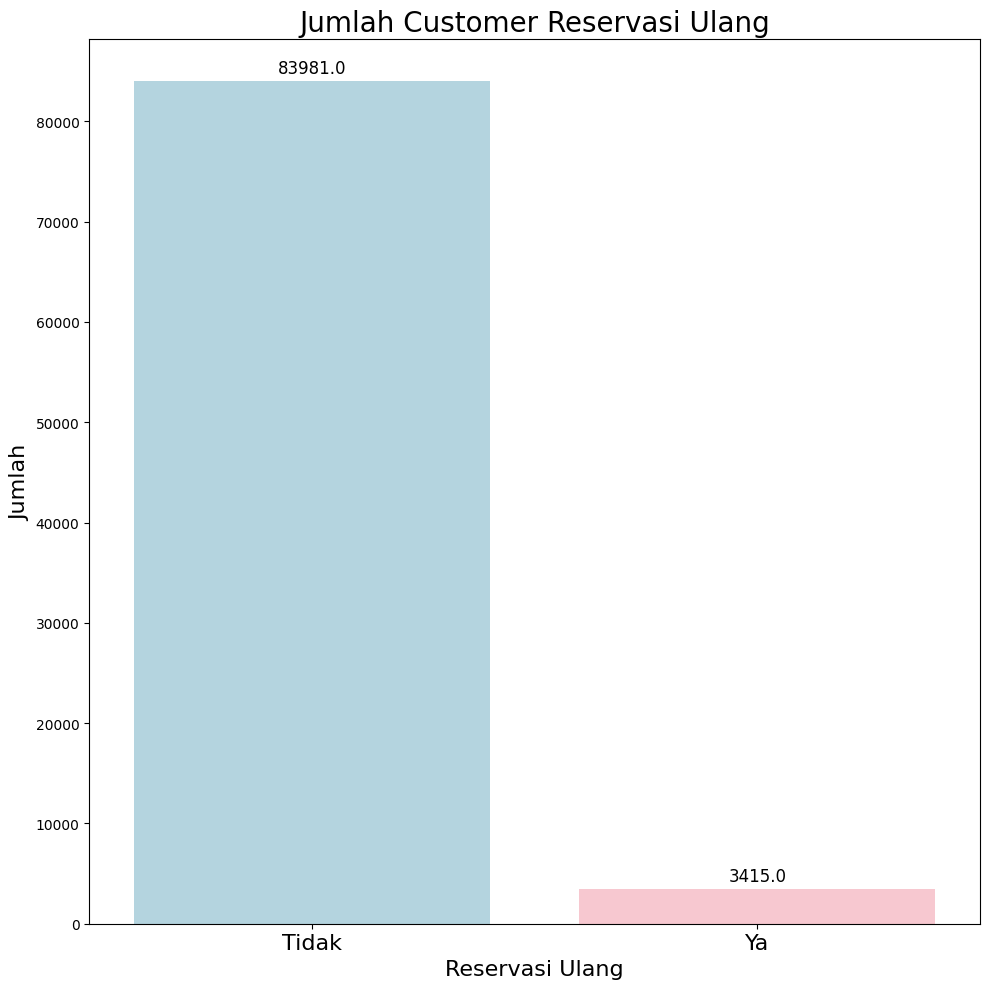

In [28]:
plt.figure(figsize=(10, 10))
ax = sns.countplot(data=df, x='is_repeated_guest', palette=palette)
ax.set_title('Jumlah Customer Reservasi Ulang', fontsize=20, color='black')
ax.set_xticklabels(['Tidak', 'Ya'], fontsize=16)
plt.xlabel('Reservasi Ulang', fontsize=16)
plt.ylabel('Jumlah', fontsize=16)
plt.yticks(fontsize=10)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.tight_layout()
plt.show()

##  Pembatalan Reservasi Berdasarkan Tipe Customer

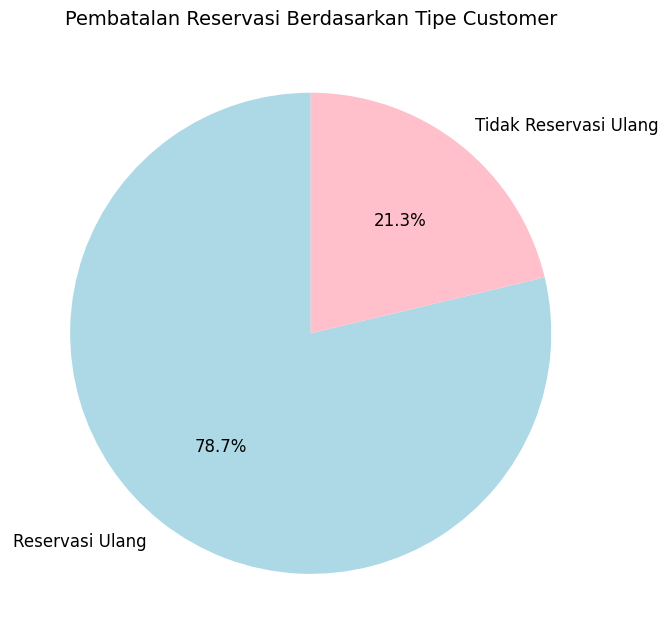

In [69]:
repeated_guest_cancellation = df.groupby('is_repeated_guest')['is_canceled'].mean()
labels = repeated_guest_cancellation.index.map({0: 'Reservasi Ulang', 1: 'Tidak Reservasi Ulang'})
values = repeated_guest_cancellation.values * 100


fig, ax = plt.subplots(figsize=(7, 7))
ax.pie(
    values,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors= palette,
    textprops={'fontsize': 12}
)

ax.set_title('Pembatalan Reservasi Berdasarkan Tipe Customer', fontsize=14)
plt.tight_layout()
plt.show()


## Distribusi Tipe Customer

In [35]:
customer_type_counts = df['customer_type'].value_counts()

fig = px.pie(
    customer_type_counts,
    values=customer_type_counts.values,
    names=customer_type_counts.index,
    title='Distribusi Tipe Customer',
    color=customer_type_counts.index,
    color_discrete_map={
        'Transient': 'skyblue',
        'Contract': 'lightcoral',
        'Transient-Party': 'lightgreen',
        'Group': 'gold'
    }
)

fig.show()

## Negara Asal Customer

In [76]:
origin_country = df[df['is_canceled'] == 0]['country'].value_counts().reset_index()
origin_country.columns = ['country', 'Number of guests']
origin_country

,country,Number of guests
0,PRT,18080
1,GBR,8448
2,FRA,7104
3,ESP,5390
4,DEU,4334
...,...,...
160,ZMB,1
161,SYC,1
162,MDG,1
163,SMR,1


In [80]:
fig = px.choropleth(origin_country ,locations=origin_country['country'], color=origin_country['Number of guests'], hover_name=origin_country['country'], title='Negara Asal Customer')
fig.show()

## 5 Negara dengan Jumlah Pembatalan Tertinggi

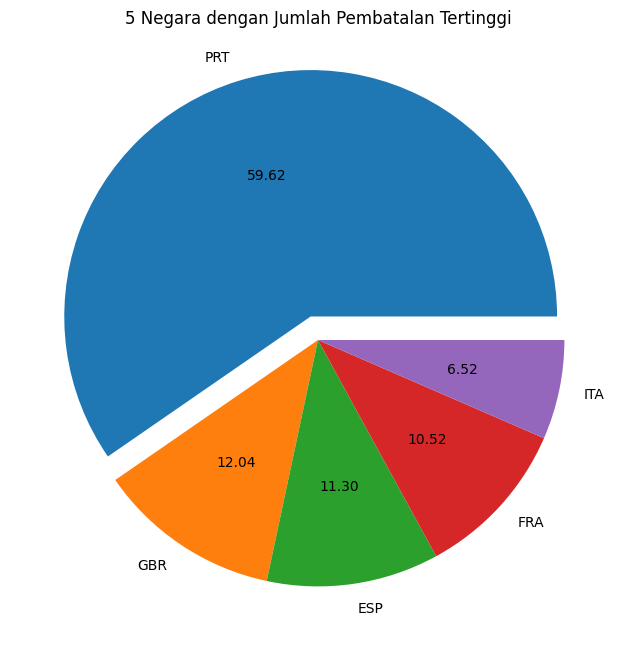

In [32]:
cancelled_data= df[df['is_canceled']==1]
top_5_cancellation = cancelled_data['country'].value_counts()[:5]

most_cancelled_country = top_5_cancellation.idxmax()
explode = [0.1 if country == most_cancelled_country else 0 for country in top_5_cancellation.index]

plt.figure(figsize=(8,8))
plt.title('5 Negara dengan Jumlah Pembatalan Tertinggi',color="black")
plt.pie(top_5_cancellation, autopct ='%.2f', labels = top_5_cancellation.index, explode=explode)
plt.show()

## Pendapatan pada Weekend dan Weekdays Masing-masing Tipe Hotel

In [73]:
avg_revenue_weekend = df.groupby(['hotel', 'stays_in_weekend_nights'])['adr'].mean().reset_index()
avg_revenue_weekday = df.groupby(['hotel', 'stays_in_week_nights'])['adr'].mean().reset_index()

fig = go.Figure()
for hotel in avg_revenue_weekend['hotel'].unique():
  fig.add_trace(go.Bar(
      x=[hotel],
      y=avg_revenue_weekend[avg_revenue_weekend['hotel']==hotel]['adr'],
      name='Weekend Average Income',
      visible=True,
      ))

for hotel in avg_revenue_weekday['hotel'].unique():
  fig.add_trace(go.Bar(
      x=[hotel],
      y=avg_revenue_weekday[avg_revenue_weekday['hotel']==hotel]['adr'],
      name='Weekday Average Income',
      visible=True
      ))

In [75]:
fig.update_layout(
    updatemenus=[
       dict(
            buttons=list([
                dict(label="Weekend",
                     method="update",
                     args=[{"visible": [True, True, False, False]},
                           {"title": "Average Revenue per Day - Weekend"}]),
                dict(label="Weekday",
                     method="update",
                     args=[{"visible": [False, False, True, True]},
                           {"title": "Average Revenue per Day - Weekday"}]),
                dict(label="Both",
                     method="update",
                     args=[{"visible": [True, True, True, True]},
                           {"title": "Average Revenue per Day - Both"}])
            ]),
            direction="down",
            showactive=True,
        )
    ], title='Pendapatan Weekend dan Weekdays Masing-masing Hotel',
    xaxis_title = 'Hotel',
    yaxis_title = 'Rata-Rata',
    barmode='group',
    template='seaborn'
)

fig.show()

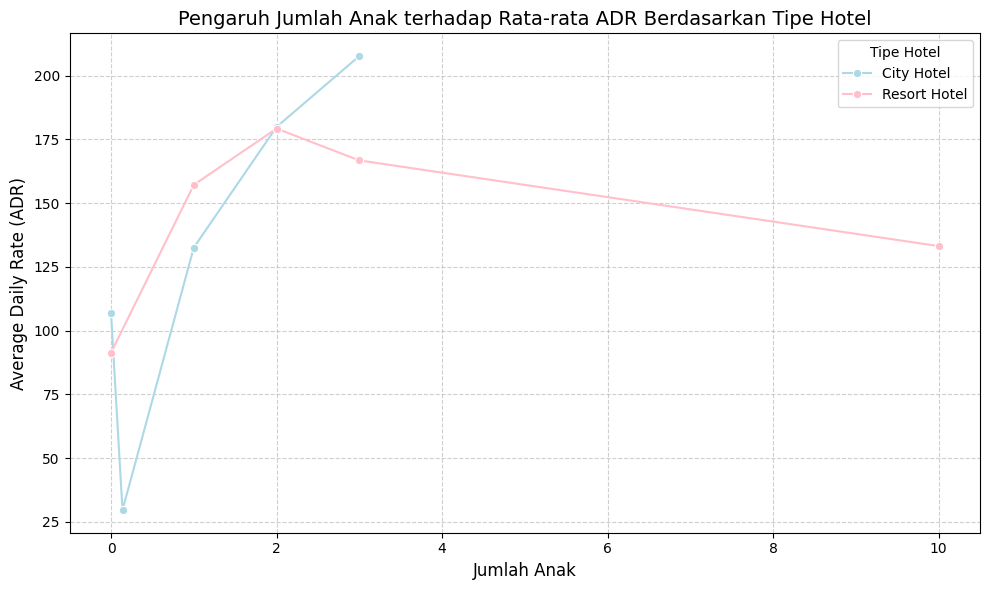

In [71]:
grouped_data = df.groupby(['children', 'hotel'])['adr'].mean().reset_index()
plt.figure(figsize=(10, 6))

sns.lineplot(
    data=grouped_data,
    x='children',
    y='adr',
    hue='hotel',
    marker='o',
    palette=palette
)

plt.title('Pengaruh Jumlah Anak terhadap Rata-rata ADR Berdasarkan Tipe Hotel', fontsize=14)
plt.xlabel('Jumlah Anak', fontsize=12)
plt.ylabel('Average Daily Rate (ADR)', fontsize=12)
plt.legend(title='Tipe Hotel', fontsize=10)
plt.grid(visible=True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


# Data Modelling

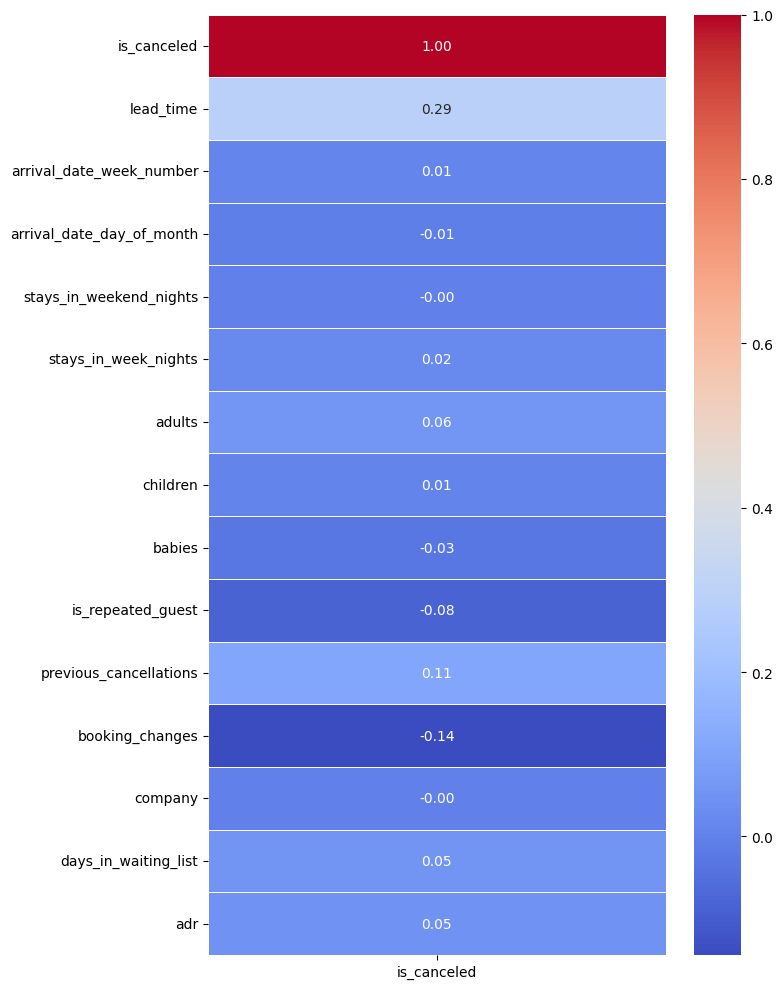

In [76]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
correlation_with_is_canceled = correlation_matrix[['is_canceled']]

plt.figure(figsize=(8, 10))
sns.heatmap(
    correlation_with_is_canceled,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    cbar=True,
    linewidths=0.5
)
plt.tight_layout()
plt.show()


In [16]:
drop_col = ['previous_bookings_not_canceled', 'arrival_date_year','country', 'required_car_parking_spaces','assigned_room_type', 'total_of_special_requests', 'agent','reservation_status']
df.drop(drop_col, axis=1, inplace=True)

In [17]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,previous_cancellations,reserved_room_type,assigned_room_type,booking_changes,deposit_type,company,days_in_waiting_list,customer_type,adr,reservation_status_date
0,Resort Hotel,0,342,July,27,1,0,0,2,0.0,...,0,C,C,3,No Deposit,189.266735,0,Transient,0.0,2015-07-01
1,Resort Hotel,0,737,July,27,1,0,0,2,0.0,...,0,C,C,4,No Deposit,189.266735,0,Transient,0.0,2015-07-01
2,Resort Hotel,0,7,July,27,1,0,1,1,0.0,...,0,A,C,0,No Deposit,189.266735,0,Transient,75.0,2015-07-02
3,Resort Hotel,0,13,July,27,1,0,1,1,0.0,...,0,A,A,0,No Deposit,189.266735,0,Transient,75.0,2015-07-02
4,Resort Hotel,0,14,July,27,1,0,2,2,0.0,...,0,A,A,0,No Deposit,189.266735,0,Transient,98.0,2015-07-03


In [20]:
categorical_col = [col for col in df.columns if df[col].dtype in ['category', 'object']]
categorical_col

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status_date']

In [22]:
cat_df = df[categorical_col]
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   hotel                    119390 non-null  object
 1   arrival_date_month       119390 non-null  object
 2   meal                     119390 non-null  object
 3   country                  119390 non-null  object
 4   market_segment           119390 non-null  object
 5   distribution_channel     119390 non-null  object
 6   reserved_room_type       119390 non-null  object
 7   assigned_room_type       119390 non-null  object
 8   deposit_type             119390 non-null  object
 9   customer_type            119390 non-null  object
 10  reservation_status_date  119390 non-null  object
dtypes: object(11)
memory usage: 10.0+ MB


In [23]:
cat_df['reservation_status_date'] = pd.to_datetime(cat_df['reservation_status_date'])
cat_df['year'] = cat_df['reservation_status_date'].dt.year
cat_df['month'] = cat_df['reservation_status_date'].dt.month
cat_df['day'] = cat_df['reservation_status_date'].dt.day

In [24]:
cat_df.drop(['reservation_status_date', 'arrival_date_month'], axis = 1, inplace=True)

In [25]:
cat_df.head()

,hotel,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,year,month,day
0,Resort Hotel,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,2015,7,1
1,Resort Hotel,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,2015,7,1
2,Resort Hotel,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,2015,7,2
3,Resort Hotel,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient,2015,7,2
4,Resort Hotel,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,2015,7,3


In [33]:
# printing unique values of each column
for col in cat_df.columns:
    print(f"{col}: \n{cat_df[col].unique()}\n")

hotel: 
['Resort Hotel' 'City Hotel']

meal: 
['BB' 'FB' 'HB' 'SC' 'Undefined']

market_segment: 
['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']

distribution_channel: 
['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']

reserved_room_type: 
['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'P' 'B']

deposit_type: 
['No Deposit' 'Refundable' 'Non Refund']

customer_type: 
['Transient' 'Contract' 'Transient-Party' 'Group']

year: 
[2015 2014 2016 2017]

month: 
[ 7  5  4  6  3  8  9  1 11 10 12  2]

day: 
[ 1  2  3  6 22 23  5  7  8 11 15 16 29 19 18  9 13  4 12 26 17 10 20 14
 30 28 25 21 27 24 31]



In [34]:
cat_df['hotel'] = cat_df['hotel'].map({'Resort Hotel' : 0, 'City Hotel' : 1})
cat_df['meal'] = cat_df['meal'].map({'BB' : 0, 'FB': 1, 'HB' : 2, 'SC': 3, 'Undefined': 4})
cat_df['market_segment']= cat_df['market_segment'].map({'Direct': 0, 'Corporate' : 1, 'Online TA': 2, 'Offline TA/TO': 3, 'Complementary': 4, 'Groups': 5,
                                                        'Undefined': 6, 'Aviation': 7})
cat_df['distribution_channel'] = cat_df['distribution_channel'].map({'Direct': 0, 'Corporate': 1, 'TA/TO': 2, 'Undefined': 3, 'GDS': 4})
cat_df['reserved_room_type'] = cat_df['reserved_room_type'].map({'C':0, 'A':1, 'D':2, 'E':3, 'G':4, 'F':5, 'H':6, 'L':7, 'P':8, 'B':9})
cat_df['deposit_type'] = cat_df['deposit_type'].map({'No Deposit':0, 'Refundable':1, 'Non Refund':2})
cat_df['customer_type'] = cat_df['customer_type'].map({'Transient':0, 'Contract':1, 'Transient-Party':2, 'Group':3})
cat_df['year']=cat_df['year'].map({2015:0, 2014:1, 2016:2, 2017:3})

In [35]:
cat_df.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day
0,0,0,0,0,0,0,0,0,7,1
1,0,0,0,0,0,0,0,0,7,1
2,0,0,0,0,1,0,0,0,7,2
3,0,0,1,1,1,0,0,0,7,2
4,0,0,2,2,1,0,0,0,7,3


In [37]:
num_df = df.drop(columns = categorical_col, axis = 1)
num_df.drop('is_canceled', axis = 1, inplace = True)
num_df

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,booking_changes,company,days_in_waiting_list,adr
0,342,27,1,0,0,2,0.0,0,0,0,3,189.266735,0,0.00
1,737,27,1,0,0,2,0.0,0,0,0,4,189.266735,0,0.00
2,7,27,1,0,1,1,0.0,0,0,0,0,189.266735,0,75.00
3,13,27,1,0,1,1,0.0,0,0,0,0,189.266735,0,75.00
4,14,27,1,0,2,2,0.0,0,0,0,0,189.266735,0,98.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,23,35,30,2,5,2,0.0,0,0,0,0,189.266735,0,96.14
119386,102,35,31,2,5,3,0.0,0,0,0,0,189.266735,0,225.43
119387,34,35,31,2,5,2,0.0,0,0,0,0,189.266735,0,157.71
119388,109,35,31,2,5,2,0.0,0,0,0,0,189.266735,0,104.40


In [38]:
num_df.var()

,0
lead_time,11419.721511
arrival_date_week_number,185.099790
arrival_date_day_of_month,77.102966
stays_in_weekend_nights,0.997229
stays_in_week_nights,3.641554
adults,0.335543
children,0.158846
babies,0.009494
is_repeated_guest,0.030894
previous_cancellations,0.712904


In [40]:
num_df['lead_time'] = np.log(num_df['lead_time'] + 1)
num_df['arrival_date_week_number'] = np.log(num_df['arrival_date_week_number'] + 1)
num_df['arrival_date_day_of_month'] = np.log(num_df['arrival_date_day_of_month'] + 1)
num_df['company'] = np.log(num_df['company'] + 1)
num_df['adr'] = np.log(num_df['adr'] + 1)

In [41]:
num_df.var()

,0
lead_time,0.230205
arrival_date_week_number,0.035179
arrival_date_day_of_month,0.052865
stays_in_weekend_nights,0.997229
stays_in_week_nights,3.641554
adults,0.335543
children,0.158846
babies,0.009494
is_repeated_guest,0.030894
previous_cancellations,0.712904


In [42]:
num_df['adr'] = num_df['adr'].fillna(value = num_df['adr'].mean())

In [43]:
num_df.head()

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,booking_changes,company,days_in_waiting_list,adr
0,1.922456,1.466077,0.526589,0,0,2,0.0,0,0,0,3,5.248427,0,0.000000
1,2.028667,1.466077,0.526589,0,0,2,0.0,0,0,0,4,5.248427,0,0.000000
2,1.124748,1.466077,0.526589,0,1,1,0.0,0,0,0,0,5.248427,0,4.330733
3,1.291725,1.466077,0.526589,0,1,1,0.0,0,0,0,0,5.248427,0,4.330733
4,1.310506,1.466077,0.526589,0,2,2,0.0,0,0,0,0,5.248427,0,4.595120


In [44]:
X = pd.concat([cat_df, num_df], axis = 1)
y = df['is_canceled']

In [45]:
X.shape, y.shape

((119390, 24), (119390,))

## Splitting Data

Membagi data dengan rasio 0.7

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

## CatBoost

In [55]:
cat = CatBoostClassifier(iterations=100)
cat.fit(X_train, y_train)

y_pred_cat = cat.predict(X_test)

acc_cat = accuracy_score(y_test, y_pred_cat)
clf_report = classification_report(y_test, y_pred_cat)

Learning rate set to 0.5
0:	learn: 0.4965868	total: 48.4ms	remaining: 4.79s
1:	learn: 0.4543926	total: 110ms	remaining: 5.38s
2:	learn: 0.4103519	total: 170ms	remaining: 5.49s
3:	learn: 0.3703250	total: 215ms	remaining: 5.17s
4:	learn: 0.3414729	total: 257ms	remaining: 4.89s
5:	learn: 0.2700252	total: 318ms	remaining: 4.97s
6:	learn: 0.2573761	total: 400ms	remaining: 5.32s
7:	learn: 0.2311353	total: 465ms	remaining: 5.34s
8:	learn: 0.2172319	total: 529ms	remaining: 5.35s
9:	learn: 0.2001238	total: 568ms	remaining: 5.11s
10:	learn: 0.1815437	total: 602ms	remaining: 4.87s
11:	learn: 0.1697179	total: 648ms	remaining: 4.75s
12:	learn: 0.1552344	total: 698ms	remaining: 4.67s
13:	learn: 0.1414640	total: 760ms	remaining: 4.67s
14:	learn: 0.1353429	total: 817ms	remaining: 4.63s
15:	learn: 0.1341958	total: 869ms	remaining: 4.56s
16:	learn: 0.1282841	total: 930ms	remaining: 4.54s
17:	learn: 0.1218950	total: 991ms	remaining: 4.51s
18:	learn: 0.1164634	total: 1.05s	remaining: 4.47s
19:	learn: 0.10

In [57]:
print(f"Accuracy Score of CatBoost Classifier is : {acc_cat}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of CatBoost Classifier is : 0.9954211687187648
Classification Report : 
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     22582
           1       1.00      0.99      0.99     13235

    accuracy                           1.00     35817
   macro avg       1.00      0.99      1.00     35817
weighted avg       1.00      1.00      1.00     35817



## XGBoost

In [59]:
xgb = XGBClassifier(booster = 'gbtree', learning_rate = 0.1, max_depth = 5, n_estimators = 180)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
clf_report = classification_report(y_test, y_pred_xgb)

In [65]:
print(f"Accuracy Score of XGBoost Classifier is : {acc_xgb}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of XGBoost Classifier is : 0.9845324845743642
Classification Report : 
              precision    recall  f1-score   support

           0       0.85      0.94      0.89     22582
           1       0.88      0.71      0.79     13235

    accuracy                           0.86     35817
   macro avg       0.86      0.83      0.84     35817
weighted avg       0.86      0.86      0.85     35817



## KNN

In [64]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred_knn)
clf_report = classification_report(y_test, y_pred_knn)

In [67]:
print(f"Accuracy Score of KNN is : {acc_knn}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of KNN is : 0.8565764860261886
Classification Report : 
              precision    recall  f1-score   support

           0       0.85      0.94      0.89     22582
           1       0.88      0.71      0.79     13235

    accuracy                           0.86     35817
   macro avg       0.86      0.83      0.84     35817
weighted avg       0.86      0.86      0.85     35817



In [72]:
models = pd.DataFrame({'Model' : ['XGBoost', 'CatBoost', 'KNN'],
                      'Score': [acc_xgb, acc_cat, acc_knn]})

models.sort_values(by='Score', ascending=False)

,Model,Score
1,CatBoost,0.995421
0,XGBoost,0.984532
2,KNN,0.856576


In [73]:
px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', title = 'Models Comparison')